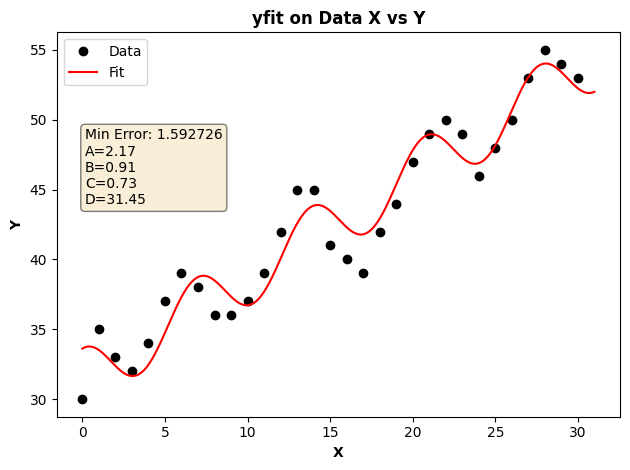

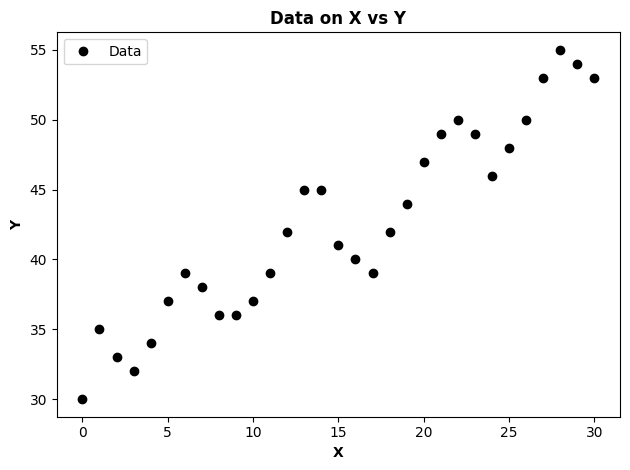

In [217]:
# GitHub: https://github.com/NajibHaidar

import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# define data
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])
n=len(Y)

def LSEfit(c, x, y):
    E = np.sqrt(np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2)/n)
    return E

# set the initial guess for the parameters
c0 = np.array([3, 1*np.pi/4, 2/3, 32])

# perform optimization
res = opt.minimize(LSEfit, c0, args=(X, Y), method='Nelder-Mead')

# get the optimized parameters
c = res.x

# generate the data for plotting
tt = np.arange(0, n+0.01, 0.01)
yfit = ((c[0]*np.cos(c[1]*tt))+(c[2]*tt) + c[3])

# plot the raw data and the fitted curve
plt.plot(X, Y, 'ko', label='Data')
plt.plot(tt, yfit, 'r-', label='Fit')
plt.legend()
plt.title('yfit on Data X vs Y', fontweight='bold')
plt.xlabel('X', fontweight='bold')
plt.ylabel('Y', fontweight='bold')
plt.text(0.05, 0.75, f"Min Error: {LSEfit(c, X, Y):.6f}\nA={c[0]:.2f}\nB={c[1]:.2f}\nC={c[2]:.2f}\nD={c[3]:.2f}", transform=plt.gca().transAxes, ha='left', va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
plt.show()

# plt.plot(X, Y, 'ko', label='Data')
# plt.legend()
# plt.title('Data on X vs Y', fontweight='bold')
# plt.xlabel('X', fontweight='bold')
# plt.ylabel('Y', fontweight='bold')
# plt.tight_layout()
# plt.show()

In [190]:
def compute_error(A, B, C, D, x, y):
    E = np.sqrt(np.sum((A*np.cos(B*x)+C*x+D-y)**2)/n)
    return E

# A_range = np.linspace(c[0]-5, c[0]+5, 101)
# B_range = np.linspace(c[1]-0.01, c[1]+0.01, 101)
# C_range = np.linspace(c[2]-10, c[2]+10, 101)
# D_range = np.linspace(c[3]-20, c[3]+20, 101)

A_range = np.linspace(0, 30, 101)
B_range = np.linspace(0, 30, 101)
C_range = np.linspace(0, 30, 101)
D_range = np.linspace(15, 45, 101)

# Define fixed parameter values
A_fixed = c[0]
B_fixed = c[1]
C_fixed = c[2]
D_fixed = c[3]

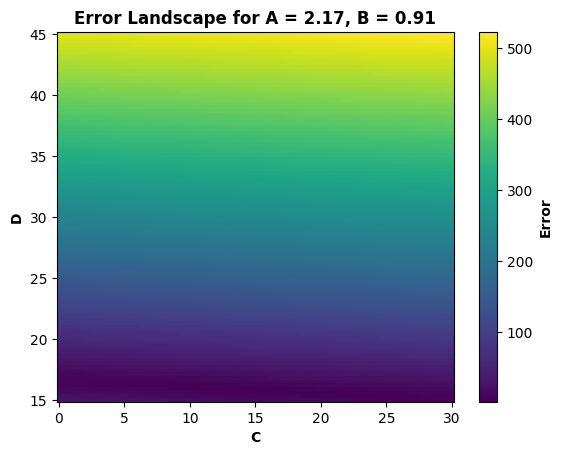

In [207]:
# FIX A B
# Initialize error grid
error_gridAB = np.zeros((len(C_range), len(D_range)))

# Loop through C and D ranges and compute error for each combination
for i, C in enumerate(C_range):
    for j, D in enumerate(D_range):
        # Compute error for fixed A and B and swept C and D
        error = compute_error(A_fixed, B_fixed, C, D, X, Y)
        # Store error in error grid
        error_gridAB[i, j] = error

# Generate x and y meshes from the ranges of C and D
C_mesh, D_mesh = np.meshgrid(C_range, D_range)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the error grid as a pcolor map
pcm = ax.pcolormesh(C_mesh, D_mesh, error_gridAB, cmap='viridis', shading='auto')

# Add a colorbar to the plot
plt.colorbar(pcm).set_label('Error', fontweight='bold')

# Set the x and y labels
ax.set_xlabel('C', fontweight='bold')
ax.set_ylabel('D', fontweight='bold')

# Set the title of the plot
ax.set_title(f'Error Landscape for A = {A_fixed:.2f}, B = {B_fixed:.2f}', fontweight='bold')

# Show the plot
plt.show()

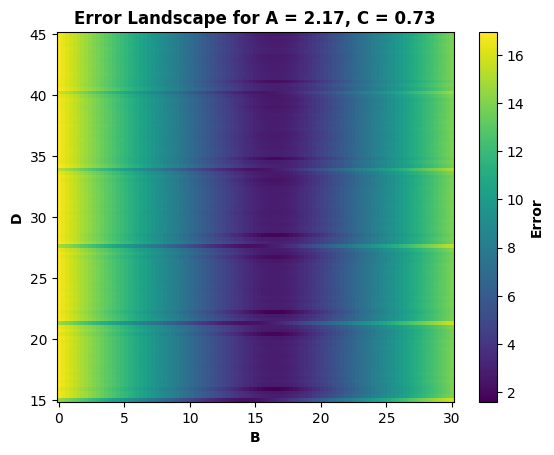

In [208]:
# FIX A C
# Initialize error grid
error_gridAC = np.zeros((len(B_range), len(D_range)))

# Loop through B and D ranges and compute error for each combination
for i, B in enumerate(B_range):
    for j, D in enumerate(D_range):
        # Compute error for fixed A and B and swept C and D
        error = compute_error(A_fixed, B, C_fixed, D, X, Y)
        # Store error in error grid
        error_gridAC[i, j] = error

# Generate x and y meshes from the ranges of C and D
B_mesh, D_mesh = np.meshgrid(B_range, D_range)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the error grid as a pcolor map
pcm = ax.pcolormesh(B_mesh, D_mesh, error_gridAC, cmap='viridis', shading='auto')

# Add a colorbar to the plot
plt.colorbar(pcm).set_label('Error', fontweight='bold')

# Set the x and y labels
ax.set_xlabel('B', fontweight='bold')
ax.set_ylabel('D', fontweight='bold')

# Set the title of the plot
ax.set_title(f'Error Landscape for A = {A_fixed:.2f}, C = {C_fixed:.2f}', fontweight='bold')

# Show the plot
plt.show()

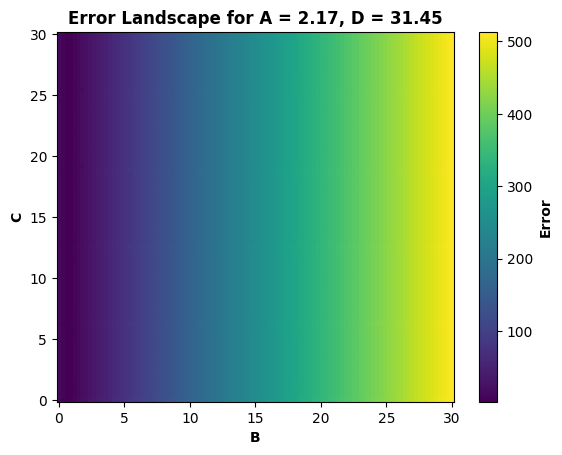

In [209]:
# FIX A D
# Initialize error grid
error_gridAD = np.zeros((len(B_range), len(C_range)))

# Loop through B and C ranges and compute error for each combination
for i, B in enumerate(B_range):
    for j, C in enumerate(C_range):
        # Compute error for fixed A and B and swept C and D
        error = compute_error(A_fixed, B, C, D_fixed, X, Y)
        # Store error in error grid
        error_gridAD[i, j] = error

# Generate x and y meshes from the ranges of B and C
B_mesh, C_mesh = np.meshgrid(B_range, C_range)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the error grid as a pcolor map
pcm = ax.pcolormesh(B_mesh, C_mesh, error_gridAD, cmap='viridis', shading='auto')

# Add a colorbar to the plot
plt.colorbar(pcm).set_label('Error', fontweight='bold')

# Set the x and y labels
ax.set_xlabel('B', fontweight='bold')
ax.set_ylabel('C', fontweight='bold')

# Set the title of the plot
ax.set_title(f'Error Landscape for A = {A_fixed:.2f}, D = {D_fixed:.2f}', fontweight='bold')

# Show the plot
plt.show()

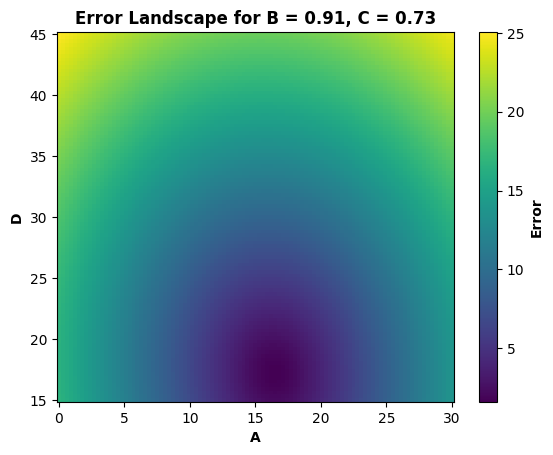

In [210]:
# FIX B C
# Initialize error grid
error_gridBC = np.zeros((len(A_range), len(D_range)))

# Loop through A and D ranges and compute error for each combination
for i, A in enumerate(A_range):
    for j, D in enumerate(D_range):
        # Compute error for fixed A and B and swept C and D
        error = compute_error(A, B_fixed, C_fixed, D, X, Y)
        # Store error in error grid
        error_gridBC[i, j] = error

# Generate x and y meshes from the ranges of B and C
A_mesh, D_mesh = np.meshgrid(A_range, D_range)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the error grid as a pcolor map
pcm = ax.pcolormesh(A_mesh, D_mesh, error_gridBC, cmap='viridis', shading='auto')

# Add a colorbar to the plot
plt.colorbar(pcm).set_label('Error', fontweight='bold')

# Set the x and y labels
ax.set_xlabel('A', fontweight='bold')
ax.set_ylabel('D', fontweight='bold')

# Set the title of the plot
ax.set_title(f'Error Landscape for B = {B_fixed:.2f}, C = {C_fixed:.2f}', fontweight='bold')

# Show the plot
plt.show()

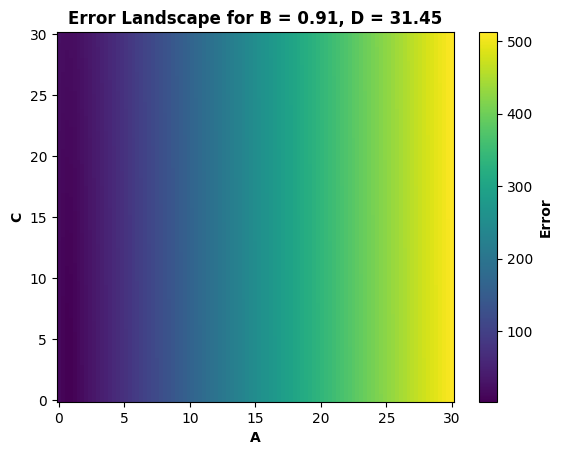

In [211]:
# FIX B D
# Initialize error grid
error_gridBD = np.zeros((len(A_range), len(C_range)))

# Loop through A and D ranges and compute error for each combination
for i, A in enumerate(A_range):
    for j, C in enumerate(C_range):
        # Compute error for fixed A and B and swept C and D
        error = compute_error(A, B_fixed, C, D_fixed, X, Y)
        # Store error in error grid
        error_gridBD[i, j] = error

# Generate x and y meshes from the ranges of B and C
A_mesh, C_mesh = np.meshgrid(A_range, C_range)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the error grid as a pcolor map
pcm = ax.pcolormesh(A_mesh, C_mesh, error_gridBD, cmap='viridis', shading='auto')

# Add a colorbar to the plot
plt.colorbar(pcm).set_label('Error', fontweight='bold')

# Set the x and y labels
ax.set_xlabel('A', fontweight='bold')
ax.set_ylabel('C', fontweight='bold')

# Set the title of the plot
ax.set_title(f'Error Landscape for B = {B_fixed:.2f}, D = {D_fixed:.2f}', fontweight='bold')

# Show the plot
plt.show()

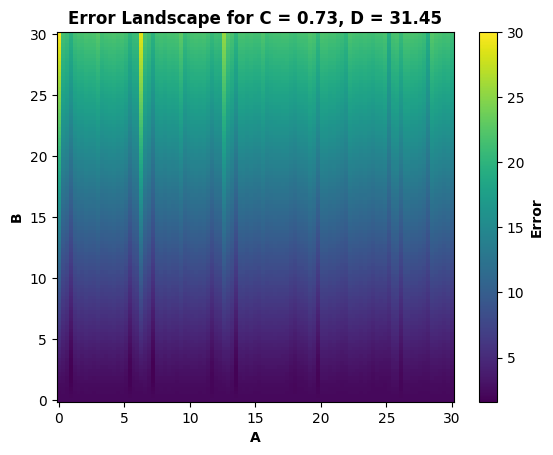

In [212]:
# FIX C D
# Initialize error grid
error_gridCD = np.zeros((len(A_range), len(B_range)))

# Loop through A and D ranges and compute error for each combination
for i, A in enumerate(A_range):
    for j, B in enumerate(B_range):
        # Compute error for fixed A and B and swept C and D
        error = compute_error(A, B, C_fixed, D_fixed, X, Y)
        # Store error in error grid
        error_gridCD[i, j] = error

# Generate x and y meshes from the ranges of B and C
A_mesh, B_mesh = np.meshgrid(A_range, B_range)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the error grid as a pcolor map
pcm = ax.pcolormesh(A_mesh, B_mesh, error_gridCD, cmap='viridis', shading='auto')

# Add a colorbar to the plot
plt.colorbar(pcm).set_label('Error', fontweight='bold')

# Set the x and y labels
ax.set_xlabel('A', fontweight='bold')
ax.set_ylabel('B', fontweight='bold')

# Set the title of the plot
ax.set_title(f'Error Landscape for C = {C_fixed:.2f}, D = {D_fixed:.2f}', fontweight='bold')

# Show the plot
plt.show()

In [220]:
import warnings

# We are fitting a 19th-degree polynomial to only 20 data points, which can cause numerical instabilities and overfitting. 
# So will suppress the warning "RankWarning: Polyfit may be poorly conditioned.
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=np.RankWarning)

    # Fit a line to the data
    line_coeffs = np.polyfit(X[:20], Y[:20], deg=1)
    line_predictions_train = np.polyval(line_coeffs, X[:20])
    line_error_train = np.sqrt(np.sum((Y[:20] - line_predictions_train) ** 2)/20)

    # Fit a parabola to the data
    parabola_coeffs = np.polyfit(X[:20], Y[:20], deg=2)
    parabola_predictions_train = np.polyval(parabola_coeffs, X[:20])
    parabola_error_train = np.sqrt(np.sum((Y[:20] - parabola_predictions_train) ** 2)/20)

    # Fit a 19th degree polynomial to the data
    poly19_coeffs = np.polyfit(X[:20], Y[:20], deg=19)
    poly19_predictions_train = np.polyval(poly19_coeffs, X[:20])
    poly19_error_train = np.sqrt(np.sum((Y[:20] - poly19_predictions_train) ** 2)/20)

    # Compute errors on test data
    line_predictions_test = np.polyval(line_coeffs, X[-10:])
    line_error_test = np.sqrt(np.sum((Y[-10:] - line_predictions_test) ** 2)/10)

    parabola_predictions_test = np.polyval(parabola_coeffs, X[-10:])
    parabola_error_test = np.sqrt(np.sum((Y[-10:] - parabola_predictions_test) ** 2)/10)

    poly19_predictions_test = np.polyval(poly19_coeffs, X[-10:])
    poly19_error_test = np.sqrt(np.sum((Y[-10:] - poly19_predictions_test) ** 2)/10)

# Print errors for each model on training and test data
print("LINE MODEL, -Test End-:")
print("Training Error:", line_error_train)
print("Test Error:", line_error_test)
print()
print("PARABOLA MODEL, -Test End-:")
print("Training Error:", parabola_error_train)
print("Test Error:", parabola_error_test)
print()
print("19th DEGREE POLYNOMIAL MODEL, -Test End-:")
print("Training Error:", poly19_error_train)
print("Test Error:", poly19_error_test)

LINE MODEL, -Test End-:
Training Error: 2.242749386808539
Test Error: 3.4392356574390317

PARABOLA MODEL, -Test End-:
Training Error: 2.125539348277377
Test Error: 9.035130793088825

19th DEGREE POLYNOMIAL MODEL, -Test End-:
Training Error: 0.02835144302630829
Test Error: 30023572038.458946


In [219]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=np.RankWarning)
    
    # Split data into training and test sets
    X_train = np.concatenate((X[:10], X[-10:]))
    Y_train = np.concatenate((Y[:10], Y[-10:]))
    X_test = X[10:-10]
    Y_test = Y[10:-10]

    # Fit a line to the training data
    line_coeffs_train = np.polyfit(X_train, Y_train, deg=1)
    line_predictions_train = np.polyval(line_coeffs_train, X_train)
    line_error_train = np.sqrt(np.sum((Y_train - line_predictions_train) ** 2)/20)

    # Fit a parabola to the training data
    parabola_coeffs_train = np.polyfit(X_train, Y_train, deg=2)
    parabola_predictions_train = np.polyval(parabola_coeffs_train, X_train)
    parabola_error_train = np.sqrt(np.sum((Y_train - parabola_predictions_train) ** 2)/20)

    # Fit a 19th degree polynomial to the training data
    poly19_coeffs_train = np.polyfit(X_train, Y_train, deg=19)
    poly19_predictions_train = np.polyval(poly19_coeffs_train, X_train)
    poly19_error_train = np.sqrt(np.sum((Y_train - poly19_predictions_train) ** 2)/20)

    # Compute errors on test data
    line_predictions_test = np.polyval(line_coeffs_train, X_test)
    line_error_test = np.sqrt(np.sum((Y_test - line_predictions_test) ** 2)/10)

    parabola_predictions_test = np.polyval(parabola_coeffs_train, X_test)
    parabola_error_test = np.sqrt(np.sum((Y_test - parabola_predictions_test) ** 2)/10)

    poly19_predictions_test = np.polyval(poly19_coeffs_train, X_test)
    poly19_error_test = np.sqrt(np.sum((Y_test - poly19_predictions_test) ** 2)/10)

# Print errors for each model on training and test data
print("LINE MODEL, -Test Middle-:")
print("Training Error:", line_error_train)
print("Test Error:", line_error_test)
print()
print("PARABOLA MODEL, -Test Middle-:")
print("Training Error:", parabola_error_train)
print("Test Error:", parabola_error_test)
print()
print("19th DEGREE POLYNOMIAL MODEL, -Test Middle-:")
print("Training Error:", poly19_error_train)
print("Test Error:", poly19_error_test)

LINE MODEL, -Test Middle-:
Training Error: 1.8516699043293752
Test Error: 2.943490105614687

PARABOLA MODEL, -Test Middle-:
Training Error: 1.85083641159579
Test Error: 2.910426615782527

19th DEGREE POLYNOMIAL MODEL, -Test Middle-:
Training Error: 0.16381508563760222
Test Error: 507.53804019224077
